In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

Data Reading, Importing the Dataset

In [2]:
forddata = pd.read_csv('/content/drive/MyDrive/Assignment 2/Data/train_data.csv').drop(['Unnamed: 0','Sentence_id'],axis=1)

forddata['New_Sentence'] = forddata['New_Sentence'].str.lower()

Data Cleaning Steps

In [3]:
forddata.info()
forddata.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60115 entries, 0 to 60114
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   New_Sentence  59002 non-null  object
 1   Type          60115 non-null  object
dtypes: object(2)
memory usage: 939.4+ KB


New_Sentence     True
Type            False
dtype: bool

In [4]:
forddata.dropna(how='any',inplace=True)
forddata.isnull().any()

New_Sentence    False
Type            False
dtype: bool

In [5]:
forddata = forddata.replace(["=",":",";","\+","\?", ">", "<","!", "#", "@", "\\\\", "$", ",", "%", "\*",
                             "\?", "\.", "\(", "\)", "\"", "\]", "\{", "\}","\[", "/br"], "", regex = True)
forddata = forddata.replace(["0","1","2","3","4","5","6","7","8","9","/","' "," "]," ",regex=True)

In [6]:
forddata.reset_index(inplace=True)
forddata.tail(30)

,index,New_Sentence,Type
58972,60085,negotiation and influencing skills,SoftSkill
58973,60086,recommendparticipate and present or review in...,Responsibility
58974,60087,cognizance of cba works to resolve union and ...,Responsibility
58975,60088,at least years of management consulting exp...,Experience
58976,60089,strong skills in office,Skill
58977,60090,minimum of years experience in the space p...,Experience
58978,60091,drive change management across geos and colla...,Responsibility
58979,60092,fss is responsible for customer relationship m...,Responsibility
58980,60093,selenium java desired,Skill
58981,60094,ensuring quality of deliverables from team by ...,Responsibility


In [7]:
forddata.head()

,index,New_Sentence,Type
0,0,author and or review architecture design and o...,Responsibility
1,1,should be able to develop custom dynamic shape...,Responsibility
2,2,experience in working crosslly with a larger ...,Requirement
3,3,previous business experience including but not...,Skill
4,4,delivering fast and right the first time,SoftSkill


## Train,Test,Validation Splitting of the Data
####We have utilized sklearn to split the data

*   We have choosen the split to be '0.3' with test_data '0.15' and validation '0.15' in order to minimize the variance between the interdependent priors.



In [8]:
from sklearn.model_selection import train_test_split

train_data,test_data =  train_test_split(forddata, test_size=0.3, random_state=1)


In [9]:
print("Size of Train Data: ", len(train_data.index))
print("Size of Test Data: ", len(test_data.index))

Size of Train Data:  41301
Size of Test Data:  17701


In [10]:
test_data, valid = train_test_split(test_data, test_size=0.5, random_state=1)


print("Size of Test_after_valid Data: ", len(test_data.index))
print("Size of Validation Data: ", len(valid.index))

Size of Test_after_valid Data:  8850
Size of Validation Data:  8851


### Prior Probability Calculation:







In [11]:
ctype_cnt = train_data['Type'].value_counts()

prior_type = pd.DataFrame(ctype_cnt).transpose()
sumctype_cnt = np.sum(ctype_cnt)
prior_type = prior_type/sumctype_cnt

prior_type

,Responsibility,Requirement,SoftSkill,Experience,Skill,Education
Type,0.258178,0.235127,0.160553,0.153023,0.115905,0.077214


In [12]:
train_data['Type'].value_counts()

Responsibility    10663
Requirement        9711
SoftSkill          6631
Experience         6320
Skill              4787
Education          3189
Name: Type, dtype: int64

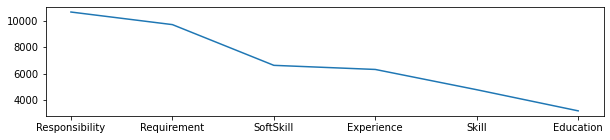

In [13]:
plt.figure(figsize=(10,2))

ctype_cnt.plot(kind='line')

###  Bag of Words: Building a vocabulary for the NBC

In [14]:
#We utilize only the words with a minimum occurence of 5 in this case

In [15]:
from collections import Counter as c


def wfreq(df,Type = "all",voclist=None,minwoccurence=5):
  
    if Type!="all":
        df = df[df["Type"]==Type]
    if bool(int(Type=="all")*int(voclist==None)):
        pass
    elif None==voclist:
        print("No vocabularity list is present.")

    voc1=[]

    print("Started")
    voc1=[s.split() for s in df["New_Sentence"]]
    voc1 = np.concatenate(voc1).flatten()

    print("Ended")
    print("Words in all the sentences:",len(voc1) )
    
    vocdic = c(voc1)

    if Type is "all":
        vocdic = {key:value for key, value in vocdic.items() if vocdic[key] >= 5}
    else:
        vocdic = {key:value for key, value in vocdic.items() if key in voclist}

    voc = list(vocdic.keys())
    print("Count of words: ",len(voc))
    
    return vocdic,voc

In [16]:
vocdic,voc=wfreq(train_data)

Started
Ended
Words in all the sentences: 502921
Count of words:  5319


In [17]:
print(list(vocdic.items())[:10])
print(voc[:10])

[('bachelors', 1222), ('degree', 2616), ('or', 6473), ('minimum', 1156), ('years', 5702), ('of', 14084), ('professional', 410), ('experience', 11271), ('technician', 46), ('ii', 23)]
['bachelors', 'degree', 'or', 'minimum', 'years', 'of', 'professional', 'experience', 'technician', 'ii']


In [18]:
wfreqdf =pd.DataFrame(voc,columns=["Vocabulary"])
wfreqdf.head(10)

,Vocabulary
0,bachelors
1,degree
2,or
3,minimum
4,years
5,of
6,professional
7,experience
8,technician
9,ii


## Building a Word Frequency table for every type of class in the dataset


*   We construct it to utilize for the likelihood in the NBC




In [19]:
for Type in ctype_cnt.index:

    print("\nType: {}".format(Type))
    vocdic_type,voc_type=wfreq(train_data,Type=Type,voclist = voc)
    voctypedf=pd.DataFrame(vocdic_type.items(),columns=["Vocabulary",Type])
    wfreqdf=wfreqdf.merge(voctypedf,how="left",on="Vocabulary")


Type: Responsibility
Started
Ended
Words in all the sentences: 164689
Count of words:  4568

Type: Requirement
Started
Ended
Words in all the sentences: 114679
Count of words:  4514

Type: SoftSkill
Started
Ended
Words in all the sentences: 61581
Count of words:  3106

Type: Experience
Started
Ended
Words in all the sentences: 81975
Count of words:  3487

Type: Skill
Started
Ended
Words in all the sentences: 48275
Count of words:  3552

Type: Education
Started
Ended
Words in all the sentences: 31722
Count of words:  2176


In [20]:
wfreqdf.head(10)

,Vocabulary,Responsibility,Requirement,SoftSkill,Experience,Skill,Education
0,bachelors,NaN,158.0,NaN,129.0,1.0,934.0
1,degree,7.0,558.0,23.0,275.0,5.0,1748.0
2,or,560.0,1413.0,121.0,1969.0,428.0,1982.0
3,minimum,10.0,54.0,15.0,1032.0,6.0,39.0
4,years,4.0,40.0,8.0,5583.0,27.0,40.0
5,of,3857.0,2650.0,863.0,4997.0,1262.0,455.0
6,professional,33.0,75.0,56.0,151.0,18.0,77.0
7,experience,227.0,2762.0,426.0,5938.0,1610.0,308.0
8,technician,18.0,4.0,NaN,18.0,2.0,4.0
9,ii,6.0,4.0,NaN,7.0,1.0,5.0


In [21]:
#Now finding the Likelihood P(Items|Class). That is, calculation of probability of a word given its type.

st=True

if st==True:
    likelihoodprob =wfreqdf.set_index("Vocabulary").fillna(0)+1
elif st==False:
    likelihoodprob=wfreqdf.set_index("Vocabulary")
likelihoodprob = likelihoodprob.div(likelihoodprob.sum(axis=0),axis=1)
likelihoodprob

,Responsibility,Requirement,SoftSkill,Experience,Skill,Education
Vocabulary,,,,,,
bachelors,0.000006,0.001377,0.000016,0.001534,0.000040,0.026181
degree,0.000049,0.004843,0.000372,0.003258,0.000119,0.048974
or,0.003456,0.012250,0.001891,0.023251,0.008525,0.055526
minimum,0.000068,0.000476,0.000248,0.012192,0.000139,0.001120
years,0.000031,0.000355,0.000140,0.065907,0.000556,0.001148
...,...,...,...,...,...,...
dar,0.000018,0.000026,0.000016,0.000024,0.000040,0.000028
nmaintain,0.000006,0.000009,0.000016,0.000071,0.000020,0.000028
shareholders,0.000025,0.000009,0.000016,0.000047,0.000020,0.000028


## Data Validation Stage

K-Fold CV: 


*   Where, K=5





In [22]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score

folds=5
#Number of folds = 5

foldsize=len(train_data)/folds
foldsize=int(foldsize) #Finding the fold length
print(foldsize)

for i in range(folds):

    if i is 0:
        cfoldval =train_data[0:foldsize]
        cfoldtrain_data = train_data[~train_data.isin(cfoldval)].dropna()
        #For the first iteration we consider the set to be the first 20% of the data.
        #Thus, we assign seperature block for the same, followed by change towards the next sets
        print('Train Data Size of this Fold:', len(cfoldtrain_data ))

    else: 
        cfoldval=train_data[foldsize * i : foldsize* (i+1)]
        cfoldtrain_data = train_data[~train_data.isin(cfoldval )].dropna()
        print('Train Data Size of this Fold:' ,len( cfoldtrain_data))

    ctype_cnt=cfoldtrain_data[ "Type"].value_counts()
    sumctype_cnt=np.sum(ctype_cnt)
    
    #Now we calculate the Prior Probability, P(Class)
    #For this we divide each class type count with the total count of all classes

    prior_type=pd.DataFrame(ctype_cnt).T
    prior_type=prior_type/sumctype_cnt
    
    vocdic,voc= wfreq(cfoldtrain_data)
    wfreqdf=pd.DataFrame(voc,columns=["Vocabulary"])
    Type=ctype_cnt.index
    j=0
    while Type[j] in ctype_cnt.index:
        vocdic_type,d=wfreq(cfoldtrain_data,voclist= voc,Type=Type[j])
        voctypedf = pd.DataFrame(vocdic_type.items(),columns=["Vocabulary",Type[j]])
        wfreqdf= wfreqdf.merge(voctypedf,how="left",on="Vocabulary" )
        j+=1
        if j==len(ctype_cnt.index):
          break
    st = True
    if st:
      likelihoodprob=wfreqdf.set_index("Vocabulary").fillna(0) + 1
    else:
      likelihoodprob =wfreqdf.set_index("Vocabulary")
    likelihoodprob = likelihoodprob.div(likelihoodprob.sum(axis=0),axis=1)
    

    foldprediction=[]
    for s in cfoldval["New_Sentence"]:
        valwrds = [w for w in s.split() if w in voc]
        valwrds_df =pd.DataFrame(valwrds,columns=["Vocabulary"])
        valwrds_df =valwrds_df.merge(likelihoodprob, how="inner",on="Vocabulary").set_index("Vocabulary")
        val_likelihoodprob =pd.DataFrame(valwrds_df.prod(axis=0),columns=["Probability"])
        val_prob =val_likelihoodprob.join(prior_type.T)
        val_prob["Fin_Probability"] = val_prob["Probability"]*val_prob["Type"]
        foldprediction.append(val_prob["Fin_Probability"].idxmax())
    accuracy=accuracy_score(cfoldval["Type"], foldprediction)
    print("Fold Level:",i+1," Detected Accuracy Rate:",accuracy)

8260
Train Data Size of this Fold: 33041
Started
Ended
Words in all the sentences: 401335
Count of words:  4713
Started
Ended
Words in all the sentences: 132658
Count of words:  4068
Started
Ended
Words in all the sentences: 90656
Count of words:  3986
Started
Ended
Words in all the sentences: 48707
Count of words:  2713
Started
Ended
Words in all the sentences: 65088
Count of words:  3074
Started
Ended
Words in all the sentences: 38751
Count of words:  3105
Started
Ended
Words in all the sentences: 25475
Count of words:  1897
Fold Level: 1  Detected Accuracy Rate: 0.6760290556900727
Train Data Size of this Fold: 33041
Started
Ended
Words in all the sentences: 403992
Count of words:  4707
Started
Ended
Words in all the sentences: 131899
Count of words:  4064
Started
Ended
Words in all the sentences: 91817
Count of words:  4025
Started
Ended
Words in all the sentences: 49070
Count of words:  2762
Started
Ended
Words in all the sentences: 66859
Count of words:  3139
Started
Ended
Words i

In [23]:
valid.head()

,index,New_Sentence,Type
13484,13725,opportunity to travel to engage with customer...,Responsibility
30681,31227,performing high level of files formatting usin...,Responsibility
55059,56098,the purpose of the role is to act as a team m...,Responsibility
54389,55410,bs ms or phd in polymer engineering material ...,Education
47703,48586,ability to convey information with clarity an...,SoftSkill


In [24]:
validprediction = []

for s in valid["New_Sentence"]:
        valwrds = [w for w in s.split() if w in voc]
        valwrds_df =pd.DataFrame(valwrds,columns=["Vocabulary"])
        valwrds_df =valwrds_df.merge(likelihoodprob, how="inner",on="Vocabulary").set_index("Vocabulary")
        val_likelihoodprob =pd.DataFrame(valwrds_df.prod(axis=0),columns=["Probability"])
        val_prob =val_likelihoodprob.join(prior_type.transpose())
        val_prob["Fin_Probability"] = val_prob["Probability"]*val_prob["Type"]
        validprediction.append(val_prob["Fin_Probability"].idxmax())


print('Generated Accuracy for Valid Data: ',accuracy_score(valid["Type"], validprediction))

Generated Accuracy for Valid Data:  0.6795842277708734


In [25]:
print(cr(validprediction, valid["Type"]))

                precision    recall  f1-score   support

     Education       0.82      0.71      0.76       790
    Experience       0.88      0.71      0.79      1682
   Requirement       0.34      0.58      0.43      1192
Responsibility       0.86      0.81      0.83      2475
         Skill       0.53      0.48      0.51      1121
     SoftSkill       0.73      0.63      0.68      1591

      accuracy                           0.68      8851
     macro avg       0.69      0.66      0.67      8851
  weighted avg       0.72      0.68      0.69      8851



In [26]:
cm(validprediction, valid["Type"])

array([[ 559,   31,  171,    5,   20,    4],
       [  19, 1199,  266,   17,  154,   27],
       [  38,   40,  692,  126,  148,  148],
       [  32,   22,  159, 2013,  104,  145],
       [  29,   54,  351,   93,  543,   51],
       [   3,   10,  419,   94,   56, 1009]])

[]

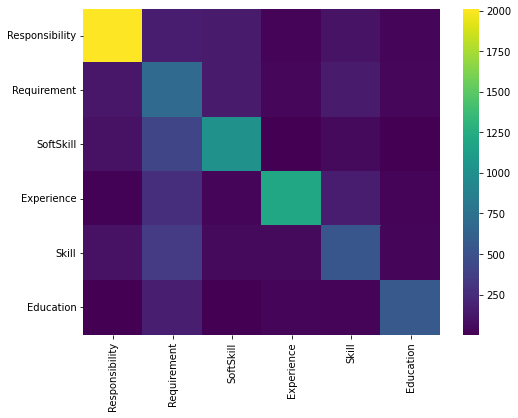

In [27]:
conf_matrix =cm(validprediction, valid["Type"], labels=ctype_cnt.index)

import seaborn

plt.figure(figsize = (8,6))
seaborn.heatmap(pd.DataFrame(conf_matrix,columns=ctype_cnt.index,index=ctype_cnt.index),cmap="viridis").plot()

##Evaluating the accuracy for the test data split

In [28]:
test_prediction=[]

for s in test_data["New_Sentence"]:
        testwrds = [w for w in s.split() if w in voc]
        testwrds_df =pd.DataFrame(testwrds,columns=["Vocabulary"])
        testwrds_df =testwrds_df.merge(likelihoodprob, how="inner",on="Vocabulary").set_index("Vocabulary")
        test_likelihoodprob =pd.DataFrame(testwrds_df.prod(axis=0),columns=["Probability"])
        test_prob =test_likelihoodprob.join(prior_type.transpose())
        test_prob["Fin_Probability"] = test_prob["Probability"]*test_prob["Type"]
        test_prediction.append(test_prob["Fin_Probability"].idxmax())

print('Generated Accuracy for Test Data: ',accuracy_score(test_data["Type"], test_prediction))

Generated Accuracy for Test Data:  0.6857627118644067


###Deriving Top 10 words that predicts each class

*   P(Class|Word) -> Posterior



In [29]:
for i in range(len(Type)):\
  likelihoodprob.iloc[:,i:i+1]=likelihoodprob.iloc[:,i:i+1]*float(prior_type.iloc[:,i:i+1].iloc[0])

for i in range(len(Type)):
  print("\nThe Top 10 words that predict: {}".format(Type[i]))
  print(likelihoodprob.nlargest(10,Type[i]).index.tolist())


The Top 10 words that predict: Responsibility
['and', 'the', 'to', 'of', 'with', 'for', 'in', 'a', 'business', 'will']

The Top 10 words that predict: Requirement
['and', 'to', 'in', 'experience', 'of', 'with', 'a', 'the', 'ability', 'or']

The Top 10 words that predict: SoftSkill
['and', 'to', 'skills', 'ability', 'in', 'with', 'a', 'communication', 'strong', 'of']

The Top 10 words that predict: Experience
['experience', 'years', 'of', 'in', 'and', 'or', 'with', 'a', 'minimum', '-']

The Top 10 words that predict: Skill
['and', 'experience', 'of', 'in', 'with', 'knowledge', 'to', 'a', 'management', 'or']

The Top 10 words that predict: Education
['or', 'in', 'degree', 'engineering', 'bachelors', 'science', 'computer', 'and', 'a', 'of']
